<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [26]:
import pandas as pd

Load the dataset into a dataframe.


In [27]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [28]:
df.shape

(11398, 85)

In [29]:
mediana_antes = df['ConvertedComp'].median()
print(f"4. La mediana de ConvertedComp antes de eliminar outliers es: {mediana_antes:.2f}")

4. La mediana de ConvertedComp antes de eliminar outliers es: 57745.00


In [30]:
me_despues=df.drop_duplicates()
mediana_despues = me_despues['ConvertedComp'].median()
print(f"4. La mediana de ConvertedComp despues de eliminar outliers es: {mediana_despues:.2f}")

4. La mediana de ConvertedComp despues de eliminar outliers es: 57745.00


In [31]:
df_sin_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
mediana_despues = df_sin_outliers['ConvertedComp'].median()
print(f"5. La mediana de ConvertedComp después de eliminar outliers es: {mediana_despues:.2f}")


5. La mediana de ConvertedComp después de eliminar outliers es: 52704.00


In [21]:
mediana_mujeres = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"2. La mediana de ConvertedComp para mujeres es: {mediana_mujeres:.2f}")

2. La mediana de ConvertedComp para mujeres es: 57708.00


In [32]:
media_despues = df_sin_outliers['ConvertedComp'].mean()
print(f"7. La media de ConvertedComp después de eliminar outliers es: {media_despues:.2f}")


7. La media de ConvertedComp después de eliminar outliers es: 59883.21


In [20]:
edad_media = df['Age'].mean()
print(f"1. La edad media de los encuestados es: {edad_media:.2f}")

1. La edad media de los encuestados es: 30.78


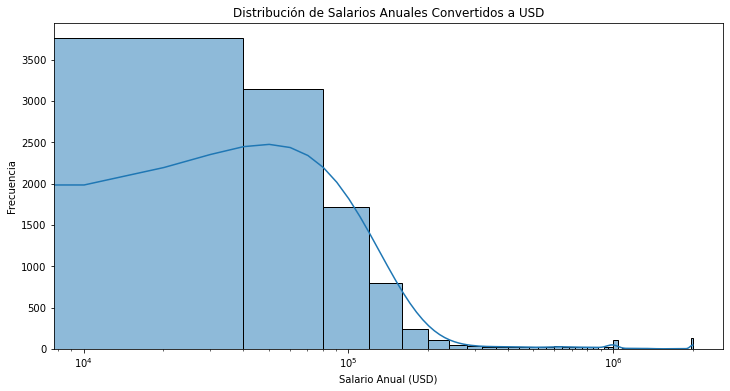

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedComp'], kde=True, bins=50)
plt.title('Distribución de Salarios Anuales Convertidos a USD')
plt.xlabel('Salario Anual (USD)')
plt.ylabel('Frecuencia')
plt.xscale('log')
plt.show()

Plot the histogram for the column `ConvertedComp`.


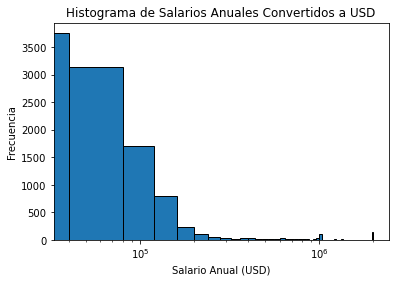

In [6]:
plt.hist(df['ConvertedComp'], bins=50, edgecolor='black')
plt.title('Histograma de Salarios Anuales Convertidos a USD')
plt.xlabel('Salario Anual (USD)')
plt.ylabel('Frecuencia')
plt.xscale('log')
plt.show()


What is the median of the column `ConvertedComp`?


In [7]:
print(df['ConvertedComp'].median())


57745.0


How many responders identified themselves only as a **Man**?


In [9]:
hombres_count = df[df['Gender'].str.contains('Man', case=False, na=False)].shape[0]
print(hombres_count)

11262


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
df_mujeres = df[df['Gender'] == 'Woman']
mediana_mujeres = df_mujeres['ConvertedComp'].median()
num_mujeres = df_mujeres.shape[0]
print(f"La mediana de ConvertedComp para las encuestadas que se identificaron como Mujer es: {mediana_mujeres:.2f}")
print(f"Número de encuestadas que se identificaron como Mujer: {num_mujeres}")

La mediana de ConvertedComp para las encuestadas que se identificaron como Mujer es: 57708.00
Número de encuestadas que se identificaron como Mujer: 731


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
summary = df['Age'].describe()
print("Cinco números resumen para Age:")
print(f"Mínimo: {summary['min']}")
print(f"Q1: {summary['25%']}")
print(f"Mediana: {summary['50%']}")
print(f"Q3: {summary['75%']}")
print(f"Máximo: {summary['max']}")

Cinco números resumen para Age:
Mínimo: 16.0
Q1: 25.0
Mediana: 29.0
Q3: 35.0
Máximo: 99.0


Plot a histogram of the column `Age`.


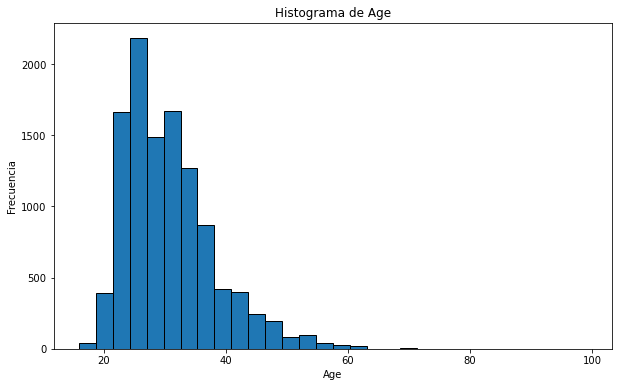

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Histograma de Age')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


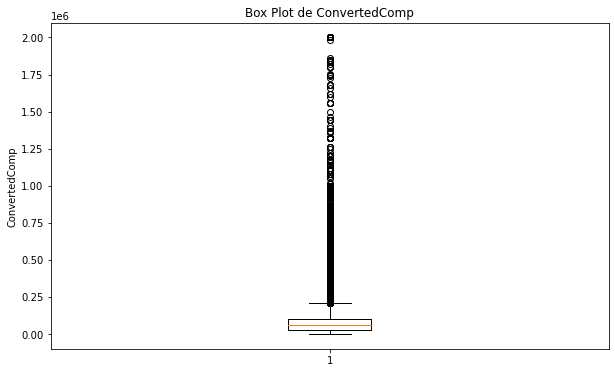

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna())
plt.title('Box Plot de ConvertedComp')
plt.ylabel('ConvertedComp')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR para ConvertedComp: {IQR}")


IQR para ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")

Límite inferior: -82830.0
Límite superior: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
print(f"Número de outliers en ConvertedComp: {len(outliers)}")

Número de outliers en ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
df_sin_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f"Tamaño del DataFrame original: {len(df)}")
print(f"Tamaño del DataFrame sin outliers: {len(df_sin_outliers)}")

Tamaño del DataFrame original: 11398
Tamaño del DataFrame sin outliers: 9703


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [35]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlaciones = df_numeric.corr()['Age'].sort_values()

print("Columnas con correlación negativa con Age:")
print(correlaciones[correlaciones < 0])

print("Columna con mayor correlación con Age:")
print(correlaciones)  # -2 porque -1 será la propia Age

Columnas con correlación negativa con Age:
CodeRevHrs   -0.020469
Name: Age, dtype: float64
Columna con mayor correlación con Age:
CodeRevHrs      -0.020469
Respondent       0.004041
CompTotal        0.006970
WorkWeekHrs      0.036518
ConvertedComp    0.105386
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
